In [1]:
from local_vars import root_folder

data_folder = "Circles"

image_size = 128
min_circle_diameter = 5
max_circle_diameter = 10
number_of_images = 10000

In [2]:
import numpy as np
import cv2
import os.path
import pandas as pd
from matplotlib import pyplot as plt

data_fullpath = os.path.join(root_folder, data_folder)

In [3]:
def generate_image():
    img = np.zeros((image_size,image_size), np.uint8)
    margin_size = max_circle_diameter // 2 + 1
    x = np.random.randint(margin_size, image_size - margin_size)
    y = np.random.randint(margin_size, image_size - margin_size)
    diameter = np.random.randint(min_circle_diameter, max_circle_diameter)
    img = cv2.circle(img, (x, y), diameter, 1, -1)
    return img, (x, y)

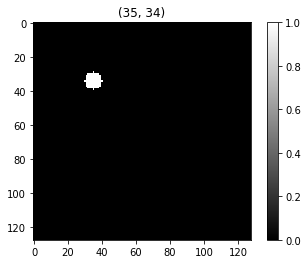

In [4]:
img, (x, y) = generate_image()
plt.title(str((x,y)))
plt.imshow(img[:, :], cmap='gray')
out = plt.colorbar()

In [5]:
if not os.path.exists(data_fullpath):
    os.makedirs(data_fullpath)
    print("Created folder: " + data_fullpath)

In [6]:
annotations_df = pd.DataFrame(columns=["file_name", "x_position", "y_position"])

for i in range(number_of_images):
    image_file_name = "{:0>5d}".format(i) + ".png"
    image_fullpath = os.path.join(data_fullpath, image_file_name)
    img, (x, y) = generate_image()
    annotations_df.loc[i] = [image_file_name, x, y]
    success = cv2.imwrite(image_fullpath, img)


In [7]:
annotations_file_name = "annotations.csv"
annotations_fullpath = os.path.join(data_fullpath, annotations_file_name)
annotations_df.to_csv(annotations_fullpath)